✅ GIF guardado como 'pierna_cinematica_directa.gif'


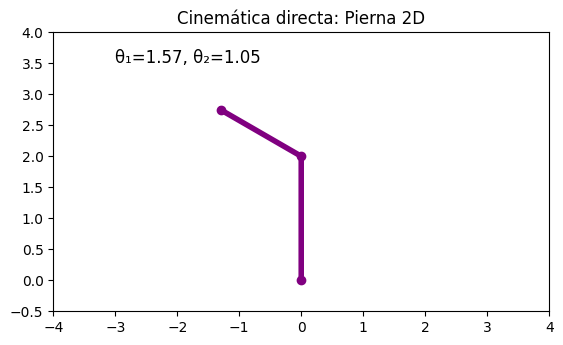

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

L1, L2 = 2, 1.5
theta1_vals = np.linspace(0, np.pi/2, 60)
theta2_vals = np.linspace(0, np.pi/3, 60)

fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-0.5, 4)
ax.set_aspect('equal')
ax.set_title("Cinemática directa: Pierna 2D")

line, = ax.plot([], [], 'o-', lw=4, color='purple')
title = ax.text(-3, 3.5, "", fontsize=12)

def init_directa():
    line.set_data([], [])
    title.set_text("")
    return line, title

def animate_directa(i):
    theta1 = theta1_vals[i % len(theta1_vals)]
    theta2 = theta2_vals[i % len(theta2_vals)]
    x0, y0 = 0, 0
    x1, y1 = L1*np.cos(theta1), L1*np.sin(theta1)
    x2, y2 = x1 + L2*np.cos(theta1 + theta2), y1 + L2*np.sin(theta1 + theta2)
    line.set_data([x0, x1, x2], [y0, y1, y2])
    title.set_text(f"θ₁={theta1:.2f}, θ₂={theta2:.2f}")
    return line, title


ani1 = FuncAnimation(fig, animate_directa, init_func=init_directa, frames=60, interval=100, blit=True)


display(HTML(ani1.to_jshtml()))


gif_writer = PillowWriter(fps=10)
ani1.save("pierna_cinematica_directa.gif", writer=gif_writer)
print("✅ GIF guardado como 'pierna_cinematica_directa.gif'")


✅ GIF guardado como 'grua_cinematica_inversa.gif'


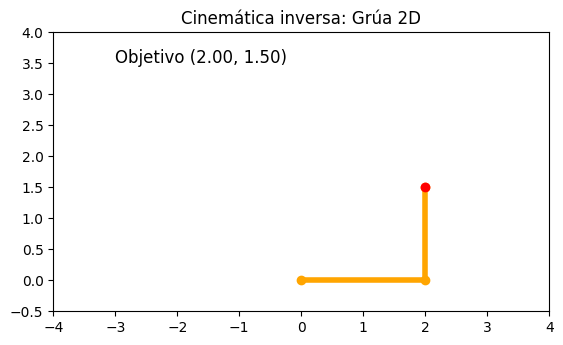

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, display

L1, L2 = 2, 1.5
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-0.5, 4)
ax.set_aspect('equal')
ax.set_title("Cinemática inversa: Grúa 2D")

line, = ax.plot([], [], 'o-', lw=4, color='orange')
target, = ax.plot([], [], 'ro')
title = ax.text(-3, 3.5, "", fontsize=12)

t_vals = np.linspace(0, 2*np.pi, 80)
target_points = np.array([[2*np.cos(t), 2*np.sin(t)+1.5] for t in t_vals])

def ik_solve(x, y, L1, L2):
    d = np.sqrt(x**2 + y**2)
    d = np.clip(d, 0.001, L1+L2)
    cos_a2 = (d**2 - L1**2 - L2**2) / (2*L1*L2)
    a2 = np.arccos(np.clip(cos_a2, -1, 1))
    a1 = np.arctan2(y, x) - np.arctan2(L2*np.sin(a2), L1+L2*np.cos(a2))
    return a1, a2

def init_inversa():
    line.set_data([], [])
    target.set_data([], [])
    title.set_text("")
    return line, target, title

def animate_inversa(i):
    x, y = target_points[i]
    a1, a2 = ik_solve(x, y, L1, L2)
    x0, y0 = 0, 0
    x1, y1 = L1*np.cos(a1), L1*np.sin(a1)
    x2, y2 = x1 + L2*np.cos(a1 + a2), y1 + L2*np.sin(a1 + a2)
    line.set_data([x0, x1, x2], [y0, y1, y2])
    target.set_data([x], [y])
    title.set_text(f"Objetivo ({x:.2f}, {y:.2f})")
    return line, target, title


ani2 = FuncAnimation(fig, animate_inversa, init_func=init_inversa,
                     frames=len(target_points), interval=100, blit=True)


display(HTML(ani2.to_jshtml()))


gif_writer = PillowWriter(fps=10)
ani2.save("grua_cinematica_inversa.gif", writer=gif_writer)
print("✅ GIF guardado como 'grua_cinematica_inversa.gif'")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

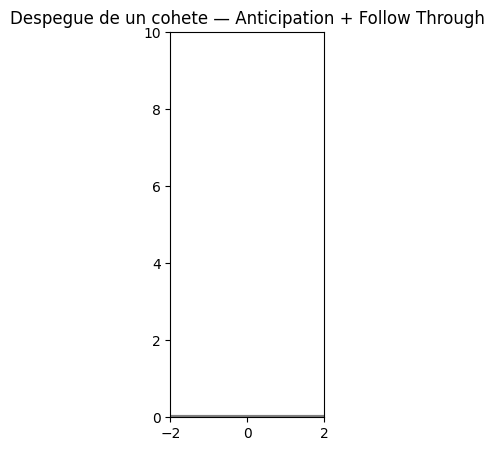

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from google.colab import files

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-2, 2)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.set_title("Despegue de un cohete — Anticipation + Follow Through")

cohete, = ax.plot([], [], 'o', color='red', markersize=20)
llama, = ax.plot([], [], 'v', color='orange', markersize=15, alpha=0.7)
ax.plot([-2, 2], [0, 0], color='gray', lw=3)

t_vals = np.linspace(0, 15, 300)

def animate(i):
    t = t_vals[i % len(t_vals)]
    if t < 2:
        y = 0.3 * np.sin(t * np.pi / 2)
    else:
        y = 0.3 + (t - 2)**1.2
    llama_y = max(0, y - 0.6 - 0.2*np.sin(t*10))
    if t < 2:
        cohete_size = 20 - 5*np.sin(t*np.pi/2)
    else:
        cohete_size = 20
    cohete.set_data([0], [y])
    llama.set_data([0], [llama_y])
    cohete.set_markersize(cohete_size)
    llama.set_markersize(15 + 5*np.sin(t*10))
    return cohete, llama

ani = FuncAnimation(fig, animate, frames=len(t_vals), interval=50, blit=True)
ani.save("cohete_animacion.gif", writer="pillow", fps=20)
files.download("cohete_animacion.gif")
